In [55]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
#plots will be rendered within the notebook itself
%matplotlib inline

import os #mengakses variabel lingkungan, mengelola direktori dan file, serta mengeksekusi perintah shell.
for dirname, _, filenames in os.walk('https://raw.githubusercontent.com/alexandrehsd/Predicting-Pulsar-Stars/master/pulsar_stars.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [56]:
# pesan peringatan yang biasanya akan ditampilkan saat menjalankan program akan diabaikan dan tidak ditampilkan.
import warnings

warnings.filterwarnings('ignore')

In [57]:
data = 'https://raw.githubusercontent.com/alexandrehsd/Predicting-Pulsar-Stars/master/pulsar_stars.csv'

df = pd.read_csv(data)# modul pandas untuk membaca file CSV.

In [58]:
# view dimensions of dataset

df.shape#memiliki 17898 baris dan 9 kolom

(17898, 9)

In [59]:
# let's preview the dataset

df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [60]:
# view the column names of the dataframe

col_names = df.columns

col_names # mendapatkan nama-nama kolom dari DataFrame df dan menyimpannya ke dalam variabel col_names

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [61]:
# menghapus spasi putih di sekitar nama-nama kolom dalam DataFrame df

df.columns = df.columns.str.strip()

In [62]:
# view column names again

df.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [63]:
# rename column names

df.columns = ['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness',
              'DM-SNR Mean', 'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class']

In [64]:
# view the renamed column names

df.columns

Index(['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 'DM-SNR Mean',
       'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class'],
      dtype='object')

In [65]:
# menghitung jumlah kemunculan setiap nilai unik dalam kolom 'target_class' dari DataFrame df

df['target_class'].value_counts()

0    16259
1     1639
Name: target_class, dtype: int64

In [66]:
# menghitung proporsi dari setiap nilai unik dalam kolom 'target_class' dari DataFrame df

df['target_class'].value_counts()/float(len(df))

0    0.908426
1    0.091574
Name: target_class, dtype: float64

In [67]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IP Mean          17898 non-null  float64
 1   IP Sd            17898 non-null  float64
 2   IP Kurtosis      17898 non-null  float64
 3   IP Skewness      17898 non-null  float64
 4   DM-SNR Mean      17898 non-null  float64
 5   DM-SNR Sd        17898 non-null  float64
 6   DM-SNR Kurtosis  17898 non-null  float64
 7   DM-SNR Skewness  17898 non-null  float64
 8   target_class     17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [68]:
# menghitung jumlah nilai yang hilang dalam setiap kolom DataFrame df

df.isnull().sum()

IP Mean            0
IP Sd              0
IP Kurtosis        0
IP Skewness        0
DM-SNR Mean        0
DM-SNR Sd          0
DM-SNR Kurtosis    0
DM-SNR Skewness    0
target_class       0
dtype: int64

In [69]:
# menghasilkan rangkuman statistik deskriptif dari DataFrame df dengan nilai-nilai yang dibulatkan menjadi dua angka desimal

round(df.describe(),2)

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness,target_class
count,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00
mean,111.08,46.55,0.48,1.77,12.61,26.33,8.30,104.86,0.09
std,25.65,6.84,1.06,6.17,29.47,19.47,4.51,106.51,0.29
min,5.81,24.77,-1.88,-1.79,0.21,7.37,-3.14,-1.98,0.00
25%,100.93,42.38,0.03,-0.19,1.92,14.44,5.78,34.96,0.00
50%,115.08,46.95,0.22,0.20,2.80,18.46,8.43,83.06,0.00
75%,127.09,51.02,0.47,0.93,5.46,28.43,10.70,139.31,0.00
max,192.62,98.78,8.07,68.10,223.39,110.64,34.54,1191.00,1.00


Text(0, 0.5, 'DM-SNR Skewness')

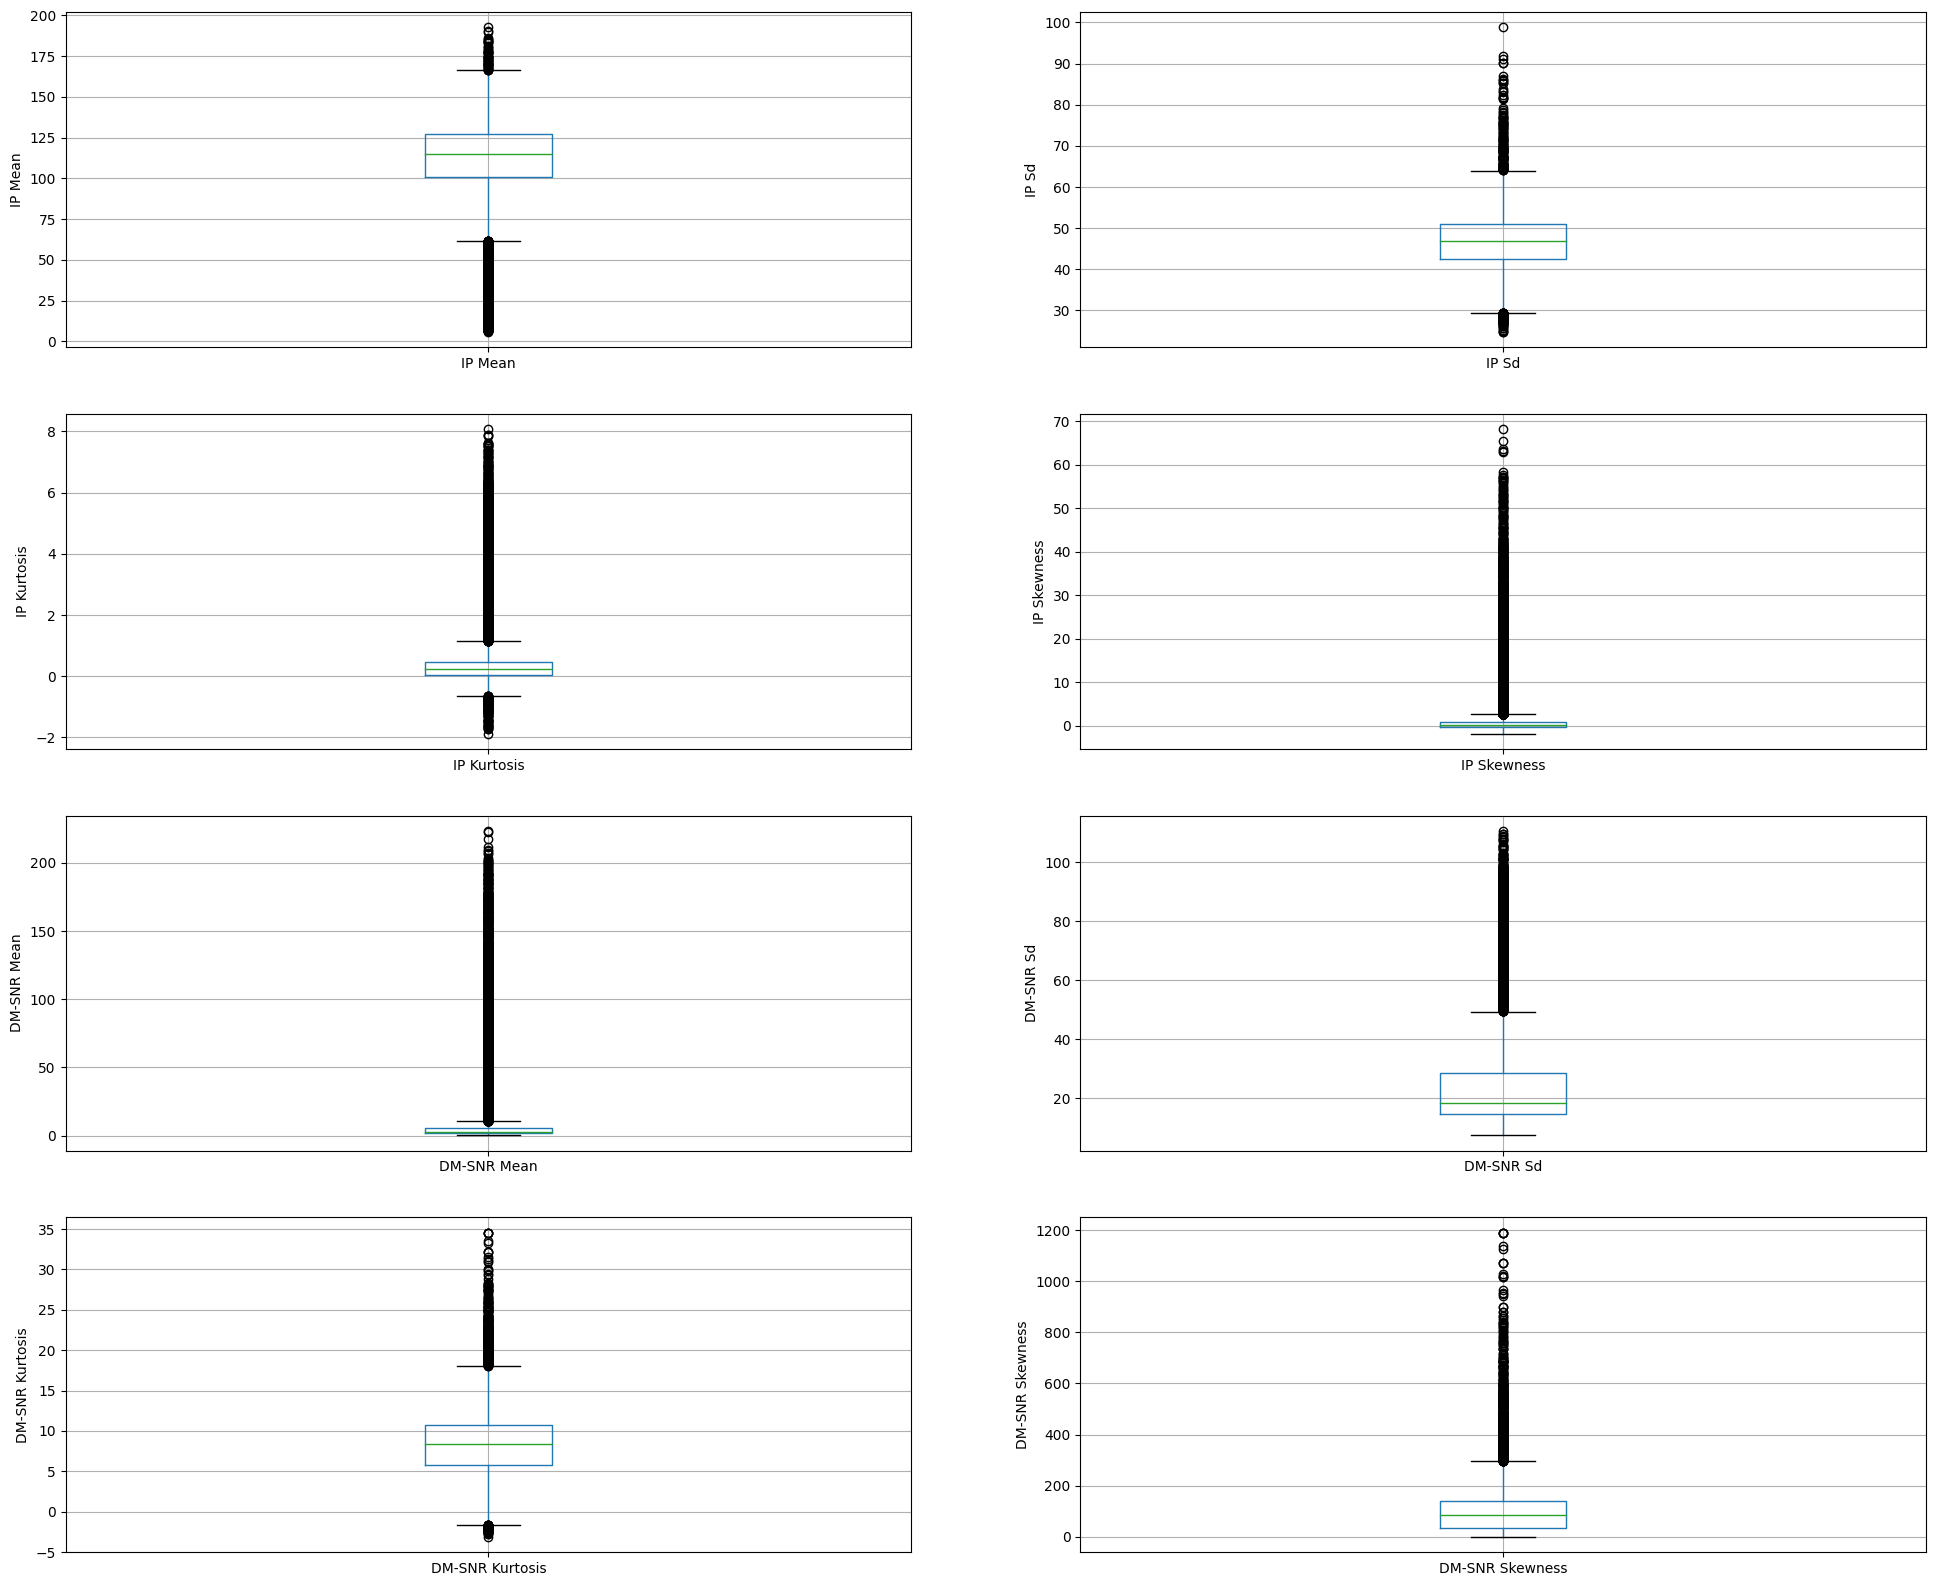

In [71]:
# draw boxplots to visualize outliers

plt.figure(figsize=(24,20)) #membuat gambar baru dengan ukuran lebar 24 inch dan tinggi 20 inch

#menetapkan subplot di baris ke-4 dan kolom ke-2, kemudian membuat box plot dari kolom 'IP Mean', menghapus judul box plot, dan menetapkan label sumbu y menjadi IP Mean'

plt.subplot(4, 2, 1)
fig = df.boxplot(column='IP Mean')
fig.set_title('')
fig.set_ylabel('IP Mean')

#menetapkan subplot di baris ke-4 dan kolom ke-2, kemudian membuat box plot dari kolom 'IP Sd', menghapus judul box plot, dan menetapkan label sumbu y menjadi 'IP Sd'

plt.subplot(4, 2, 2)
fig = df.boxplot(column='IP Sd')
fig.set_title('')
fig.set_ylabel('IP Sd')

#menetapkan subplot di baris ke-4 dan kolom ke-2, kemudian membuat box plot dari kolom 'IP Kurtosis', menghapus judul box plot, dan menetapkan label sumbu y menjadi 'IP Kurtosis'

plt.subplot(4, 2, 3)
fig = df.boxplot(column='IP Kurtosis')
fig.set_title('')
fig.set_ylabel('IP Kurtosis')

#menetapkan subplot di baris ke-4 dan kolom ke-2, kemudian membuat box plot dari kolom 'IP Skewness', menghapus judul box plot, dan menetapkan label sumbu y menjadi 'IP Skewness'

plt.subplot(4, 2, 4)
fig = df.boxplot(column='IP Skewness')
fig.set_title('')
fig.set_ylabel('IP Skewness')

#menetapkan subplot di baris ke-4 dan kolom ke-2, kemudian membuat box plot dari kolom 'DM-SNR Mean', menghapus judul box plot, dan menetapkan label sumbu y menjadi 'DM-SNR Mean'

plt.subplot(4, 2, 5)
fig = df.boxplot(column='DM-SNR Mean')
fig.set_title('')
fig.set_ylabel('DM-SNR Mean')

#menetapkan subplot di baris ke-4 dan kolom ke-2, kemudian membuat box plot dari kolom 'DM-SNR Sd', menghapus judul box plot, dan menetapkan label sumbu y menjadi 'DM-SNR Sd'

plt.subplot(4, 2, 6)
fig = df.boxplot(column='DM-SNR Sd')
fig.set_title('')
fig.set_ylabel('DM-SNR Sd')

#menetapkan subplot di baris ke-4 dan kolom ke-2, kemudian membuat box plot dari kolom 'DM-SNR Kurtosis', menghapus judul box plot, dan menetapkan label sumbu y menjadi 'DM-SNR Kurtosis'

plt.subplot(4, 2, 7)
fig = df.boxplot(column='DM-SNR Kurtosis')
fig.set_title('')
fig.set_ylabel('DM-SNR Kurtosis')

#menetapkan subplot di baris ke-4 dan kolom ke-2, kemudian membuat box plot dari kolom 'DM-SNR Skewness', menghapus judul box plot, dan menetapkan label sumbu y menjadi 'DM-SNR Skewness'

plt.subplot(4, 2, 8)
fig = df.boxplot(column='DM-SNR Skewness')
fig.set_title('')
fig.set_ylabel('DM-SNR Skewness')

Text(0, 0.5, 'Number of pulsar stars')

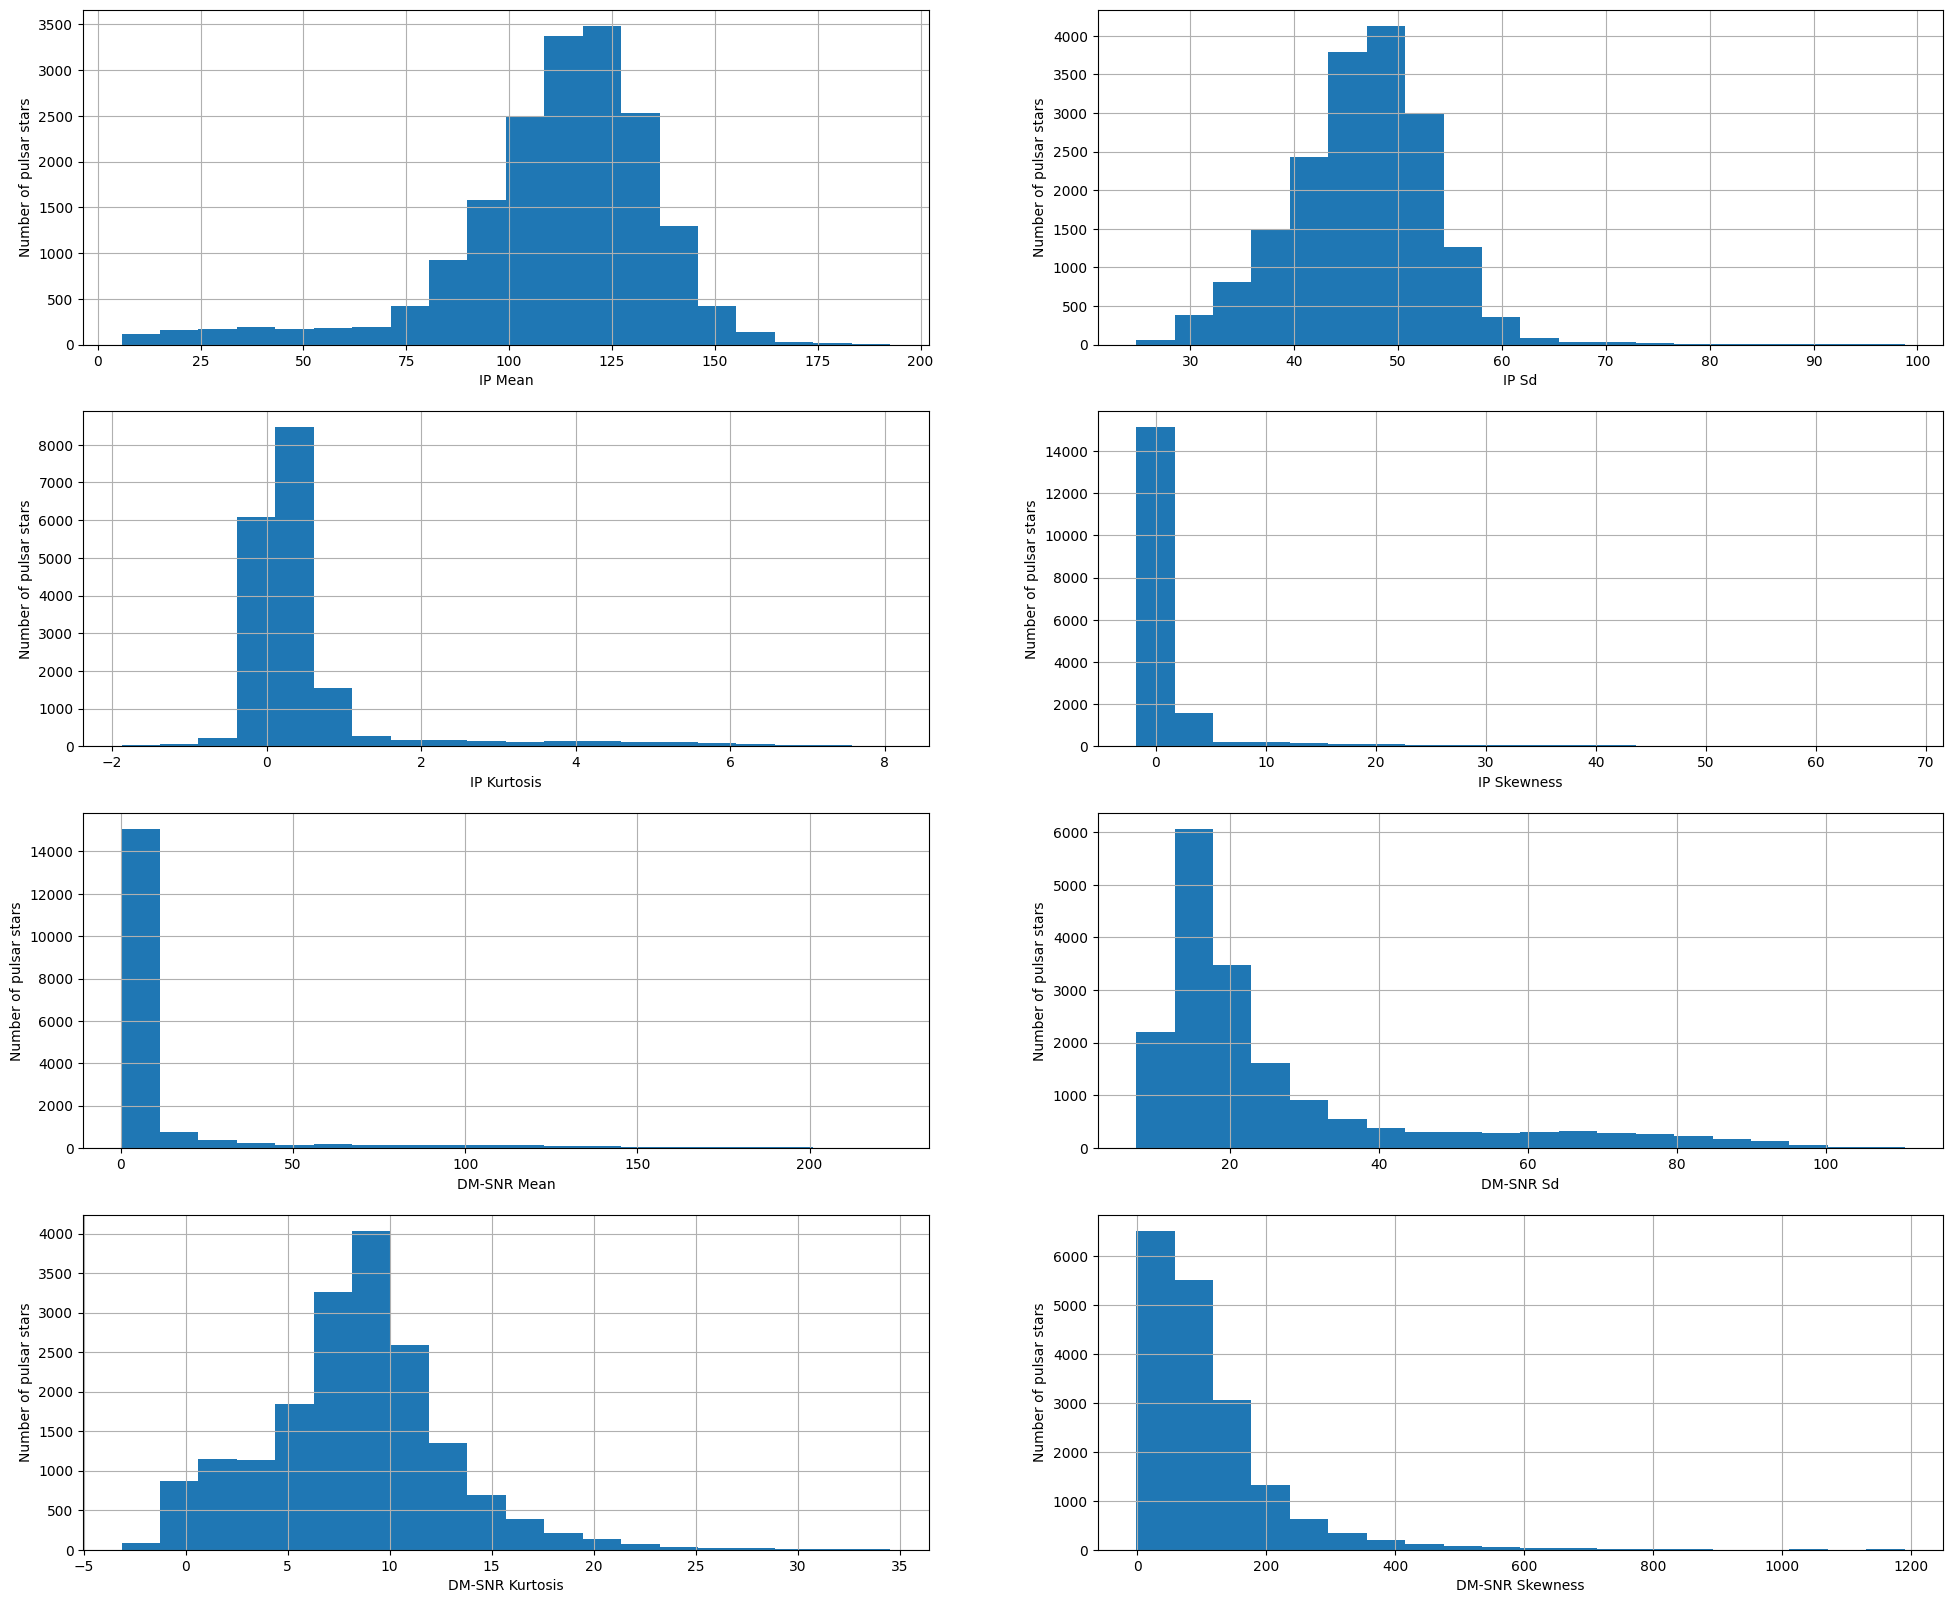

In [72]:
# plot histogram to check distribution
#membuat sebuah gambar baru dengan ukuran lebar 24 inch dan tinggi 20 inch
plt.figure(figsize=(24,20))

#membuat histogram dari kolom 'IP Mean' dalam DataFrame df, menetapkan label sumbu x dan y, dan menampilkan histogram di subplot pertama pada gambar.
plt.subplot(4, 2, 1)
fig = df['IP Mean'].hist(bins=20)
fig.set_xlabel('IP Mean')
fig.set_ylabel('Number of pulsar stars')

# membuat histogram dari kolom 'IP Sd' dalam DataFrame df, menetapkan label sumbu x dan y, dan menampilkan histogram di subplot kedua pada gambar.
plt.subplot(4, 2, 2)
fig = df['IP Sd'].hist(bins=20)
fig.set_xlabel('IP Sd')
fig.set_ylabel('Number of pulsar stars')

#membuat histogram dari kolom 'IP Kurtosis' dalam DataFrame df, menetapkan label sumbu x dan y, dan menampilkan histogram di subplot ketiga pada gambar.
plt.subplot(4, 2, 3)
fig = df['IP Kurtosis'].hist(bins=20)
fig.set_xlabel('IP Kurtosis')
fig.set_ylabel('Number of pulsar stars')

#membuat histogram dari kolom 'IP Skewness' dalam DataFrame df, menetapkan label sumbu x dan y, dan menampilkan histogram di subplot keempat pada gambar.
plt.subplot(4, 2, 4)
fig = df['IP Skewness'].hist(bins=20)
fig.set_xlabel('IP Skewness')
fig.set_ylabel('Number of pulsar stars')

#membuat histogram dari kolom 'DM-SNR Mean' dalam DataFrame df, menetapkan label sumbu x dan y, dan menampilkan histogram di subplot kelima pada gambar.
plt.subplot(4, 2, 5)
fig = df['DM-SNR Mean'].hist(bins=20)
fig.set_xlabel('DM-SNR Mean')
fig.set_ylabel('Number of pulsar stars')

#membuat histogram dari kolom 'DM-SNR Sd' dalam DataFrame df, menetapkan label sumbu x dan y, dan menampilkan histogram di subplot keenam pada gambar.
plt.subplot(4, 2, 6)
fig = df['DM-SNR Sd'].hist(bins=20)
fig.set_xlabel('DM-SNR Sd')
fig.set_ylabel('Number of pulsar stars')

#membuat histogram dari kolom 'DM-SNR Kurtosis' dalam DataFrame df, menetapkan label sumbu x dan y, dan menampilkan histogram di subplot ketujuh pada gambar.
plt.subplot(4, 2, 7)
fig = df['DM-SNR Kurtosis'].hist(bins=20)
fig.set_xlabel('DM-SNR Kurtosis')
fig.set_ylabel('Number of pulsar stars')

# membuat histogram dari kolom 'DM-SNR Skewness' dalam DataFrame df, menetapkan label sumbu x dan y, dan menampilkan histogram di subplot kedelapan pada gambar.
plt.subplot(4, 2, 8)
fig = df['DM-SNR Skewness'].hist(bins=20)
fig.set_xlabel('DM-SNR Skewness')
fig.set_ylabel('Number of pulsar stars')

In [73]:
#X akan berisi fitur-fitur data tanpa kolom target, sedangkan y akan berisi label target.
X = df.drop(['target_class'], axis=1)

y = df['target_class']

In [74]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [76]:
# check the shape of X_train and X_test
#informasi tentang jumlah baris dan kolom dari data fitur untuk pelatihan (X_train) dan pengujian (X_test) secara berurutan.
X_train.shape, X_test.shape

((14318, 8), (3580, 8))

In [77]:
#cols akan berisi daftar nama kolom yang ada dalam DataFrame X_train.
cols = X_train.columns

In [78]:
#mengimpor kelas StandardScaler dari modul preprocessing di scikit-learn.
from sklearn.preprocessing import StandardScaler
#membuat objek scaler yang akan digunakan untuk penskalaan fitur.
scaler = StandardScaler()
#menghitung rata-rata dan standar deviasi dari setiap fitur di X_train, lalu melakukan penskalaan dengan mengurangkan rata-rata dan membagi dengan standar deviasi.
X_train = scaler.fit_transform(X_train)
#menggunakan rata-rata dan standar deviasi yang telah dihitung dari data latih untuk melakukan penskalaan pada data uji, sehingga memastikan penskalaan yang konsisten dengan data latih.
X_test = scaler.transform(X_test)

In [80]:
#menciptakan sebuah DataFrame baru X_train dari data yang telah diubah skala X_train, dengan menetapkan nama kolomnya menggunakan daftar nama kolom dari DataFrame asli X_train yang disimpan dalam variabel cols.
X_train = pd.DataFrame(X_train, columns=[cols])

In [79]:
#menciptakan sebuah DataFrame baru X_test dari data yang telah diubah skala X_test, dengan menetapkan nama kolomnya menggunakan daftar nama kolom dari DataFrame asli X_test yang disimpan dalam variabel cols.
X_test = pd.DataFrame(X_test, columns=[cols])

In [81]:
#ringkasan statistik deskriptif dari data latih X_train dalam DataFrame.
X_train.describe()

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness
count,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04
mean,1.908113e-16,-6.550610e-16,1.042143e-17,3.870815e-17,-8.734147e-17,-1.617802e-16,-1.513588e-17,1.122785e-16
std,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00
min,-4.035499e+00,-3.181033e+00,-2.185946e+00,-5.744051e-01,-4.239001e-01,-9.733707e-01,-2.455649e+00,-1.003411e+00
25%,-3.896291e-01,-6.069473e-01,-4.256221e-01,-3.188054e-01,-3.664918e-01,-6.125457e-01,-5.641035e-01,-6.627590e-01
50%,1.587461e-01,5.846646e-02,-2.453172e-01,-2.578142e-01,-3.372294e-01,-4.067482e-01,3.170446e-02,-2.059136e-01
75%,6.267059e-01,6.501017e-01,-1.001238e-02,-1.419621e-01,-2.463724e-01,1.078934e-01,5.362759e-01,3.256217e-01
max,3.151882e+00,7.621116e+00,7.008906e+00,1.054430e+01,7.025568e+00,4.292181e+00,5.818557e+00,1.024613e+01


In [115]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC()


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
#mencetak akurasi model dengan menggunakan metrik accuracy_score pada data uji dan prediksi yang dihasilkan.
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9827


In [117]:
# instantiate classifier with rbf kernel and C=100
#membuat objek SVC dengan parameter C yang ditetapkan sebagai 100.0. Parameter C mengontrol trade-off antara margin yang lebih besar dan penalti yang lebih besar terhadap kesalahan klasifikasi yang tidak sesuai.
svc=SVC(C=100.0)


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
# mencetak akurasi model dengan menggunakan metrik accuracy_score pada data uji dan prediksi yang dihasilkan dengan menggunakan kernel rbf dan parameter C=100.0.
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.9832


In [118]:
# instantiate classifier with rbf kernel and C=1000
svc=SVC(C=1000.0)


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.9816


In [119]:
# membuat objek SVC dengan kernel linear dan parameter C yang ditetapkan sebagai 1.0. Dalam SVM, kernel linear digunakan untuk menentukan keputusan dengan cara mencari garis pemisah linear terbaik.
linear_svc=SVC(kernel='linear', C=1.0)


# melatih model SVC dengan kernel linear menggunakan data latih (X_train) dan label latih (y_train).
linear_svc.fit(X_train,y_train)


# menggunakan model yang dilatih untuk membuat prediksi menggunakan data uji (X_test).
y_pred_test=linear_svc.predict(X_test)


# mencetak akurasi model dengan menggunakan metrik accuracy_score pada data uji dan prediksi yang dihasilkan dengan menggunakan kernel linear dan parameter C=1.0.
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.9830


In [120]:
# instantiate classifier with linear kernel and C=100.0
linear_svc100=SVC(kernel='linear', C=100.0)


# fit classifier to training set
linear_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 0.9832


In [121]:
# instantiate classifier with linear kernel and C=1000.0
linear_svc1000=SVC(kernel='linear', C=1000.0)


# fit classifier to training set
linear_svc1000.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc1000.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=1000.0 : 0.9832


In [122]:
#membuat prediksi terhadap data latih X_train menggunakan model yang telah dilatih dengan kernel linear.
y_pred_train = linear_svc.predict(X_train)
#menampilkan prediksi yang dihasilkan dari data latih.
y_pred_train

array([0, 0, 1, ..., 0, 0, 0])

In [123]:
#mencetak akurasi model terhadap data latih dengan empat angka di belakang koma.
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9783


In [124]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))

Training set score: 0.9783
Test set score: 0.9830


In [126]:
# menghitung jumlah sampel untuk setiap kelas dalam data uji.

y_test.value_counts()

0    3306
1     274
Name: target_class, dtype: int64

In [127]:
# menghitung skor akurasi nol, yang merupakan proporsi sampel terbesar dalam data uji.
null_accuracy = (3306/(3306+274))
#mencetak skor akurasi nol dengan empat angka di belakang koma.
print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.9235


In [128]:
# membuat objek SVC dengan kernel polinomial dan parameter C yang ditetapkan sebagai 1.0. Kernel polinomial digunakan untuk menentukan keputusan dengan cara mencari pemisah non-linear berdasarkan fitur polinomial.
poly_svc=SVC(kernel='poly', C=1.0)


# melatih model SVC dengan kernel polinomial menggunakan data latih (X_train) dan label latih (y_train).
poly_svc.fit(X_train,y_train)


# menggunakan model yang dilatih untuk membuat prediksi menggunakan data uji (X_test).
y_pred=poly_svc.predict(X_test)


# mencetak akurasi model dengan menggunakan metrik accuracy_score pada data uji dan prediksi yang dihasilkan dengan menggunakan kernel polinomial dan parameter C=1.0.
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9807


In [129]:
# instantiate classifier with polynomial kernel and C=100.0
poly_svc100=SVC(kernel='poly', C=100.0)


# fit classifier to training set
poly_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=poly_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9824


In [130]:
#  membuat objek SVC dengan kernel sigmoid dan parameter C yang ditetapkan sebagai 1.0. Kernel sigmoid digunakan untuk menentukan keputusan dengan cara menggunakan fungsi sigmoid.
sigmoid_svc=SVC(kernel='sigmoid', C=1.0)


# melatih model SVC dengan kernel sigmoid menggunakan data latih (X_train) dan label latih (y_train).
sigmoid_svc.fit(X_train,y_train)


# menggunakan model yang dilatih untuk membuat prediksi menggunakan data uji (X_test).
y_pred=sigmoid_svc.predict(X_test)


# mencetak akurasi model dengan menggunakan metrik accuracy_score pada data uji dan prediksi yang dihasilkan dengan menggunakan kernel sigmoid dan parameter C=1.0.
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=1.0 : 0.8858


In [131]:
# instantiate classifier with sigmoid kernel and C=100.0
sigmoid_svc100=SVC(kernel='sigmoid', C=100.0)


# fit classifier to training set
sigmoid_svc100.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=100.0 : 0.8855


In [132]:
# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix

#menghitung matriks kebingungan untuk data uji y_test dan prediksi yang dihasilkan y_pred_test.
cm = confusion_matrix(y_test, y_pred_test)

#mencetak matriks kebingungan untuk mengevaluasi kinerja model.
print('Confusion matrix\n\n', cm)

#mencetak jumlah true positives (TP), yang merupakan prediksi positif yang benar.
print('\nTrue Positives(TP) = ', cm[0,0])

#mencetak jumlah true negatives (TN), yang merupakan prediksi negatif yang benar.
print('\nTrue Negatives(TN) = ', cm[1,1])

#mencetak jumlah false positives (FP), yang merupakan prediksi positif yang salah.
print('\nFalse Positives(FP) = ', cm[0,1])

#mencetak jumlah false negatives (FN), yang merupakan prediksi negatif yang salah.
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[3289   17]
 [  44  230]]

True Positives(TP) =  3289

True Negatives(TN) =  230

False Positives(FP) =  17

False Negatives(FN) =  44


<Axes: >

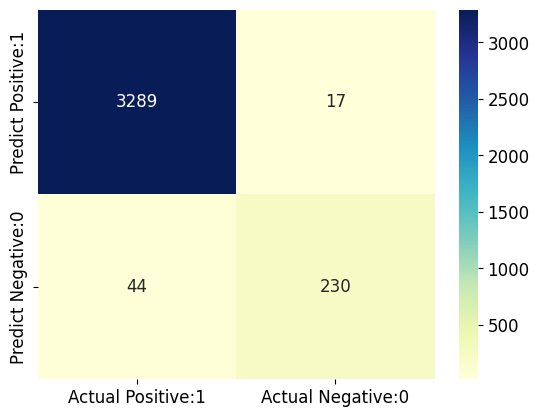

In [134]:
# visualize confusion matrix with seaborn heatmap
#membuat DataFrame cm_matrix dari matriks kebingungan cm. Kolom dan baris DataFrame ini diberi label sesuai dengan kelas aktual dan prediksi.
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

#menggunakan seaborn untuk membuat peta panas (heatmap) dari DataFrame cm_matrix. Parameter annot=True menambahkan nilai di dalam sel, fmt='d' digunakan untuk menampilkan nilai sebagai integer, dan cmap='YlGnBu' menetapkan skema warna heatmap.
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [135]:
#mengimpor fungsi classification_report dari modul metrics di scikit-learn.
from sklearn.metrics import classification_report
# menghasilkan laporan klasifikasi yang menyediakan metrik evaluasi seperti presisi, recall, f1-score, dan dukungan untuk setiap kelas, serta nilai rata-rata dari semua kelas. Ini membantu dalam mengevaluasi kinerja model klasifikasi.
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3306
           1       0.93      0.84      0.88       274

    accuracy                           0.98      3580
   macro avg       0.96      0.92      0.94      3580
weighted avg       0.98      0.98      0.98      3580



In [136]:
#digunakan untuk mendefinisikan variabel TP yang berisi jumlah true positives (TP).
TP = cm[0,0]
#digunakan untuk mendefinisikan variabel TN yang berisi jumlah true negatives (TN).
TN = cm[1,1]
#digunakan untuk mendefinisikan variabel FP yang berisi jumlah false positives (FP).
FP = cm[0,1]
#digunakan untuk mendefinisikan variabel FN yang berisi jumlah false negatives (FN).
FN = cm[1,0]

In [137]:
# print classification accuracy
#menghitung akurasi klasifikasi, yang merupakan proporsi dari total prediksi yang benar terhadap keseluruhan prediksi.
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
#mencetak nilai akurasi klasifikasi dengan format yang ditentukan. Pernyataan ini mencetak akurasi klasifikasi dengan empat angka di belakang koma.
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9830


In [138]:
# print classification error
#menghitung error klasifikasi, yang merupakan proporsi dari total prediksi yang salah terhadap keseluruhan prediksi.
classification_error = (FP + FN) / float(TP + TN + FP + FN)
#mencetak nilai error klasifikasi dengan format yang ditentukan. Pernyataan ini mencetak error klasifikasi dengan empat angka di belakang koma.
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0170


In [140]:
# print precision score
#menghitung presisi, yang merupakan proporsi dari prediksi positif yang benar terhadap total prediksi positif yang dilakukan.
precision = TP / float(TP + FP)
#Pernyataan ini mencetak presisi dengan empat angka di belakang koma. Presisi mengukur seberapa akurat model dalam memprediksi positif.
print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9949


In [141]:
#menghitung recall atau sensitivitas, yang merupakan proporsi dari total kelas positif yang terdeteksi dengan benar oleh model terhadap keseluruhan kelas positif yang sebenarnya.
recall = TP / float(TP + FN)
#Pernyataan ini mencetak recall dengan empat angka di belakang koma. Recall memberikan gambaran tentang kemampuan model untuk mengidentifikasi kelas positif dengan benar.
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9868


In [142]:
#Pernyataan ini mencetak True Positive Rate dengan empat angka di belakang koma. True Positive Rate memberikan gambaran tentang kemampuan model untuk mengidentifikasi kelas positif dengan benar.
true_positive_rate = TP / float(TP + FN)

print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9868


In [143]:
#Pernyataan ini mencetak False Positive Rate dengan empat angka di belakang koma. False Positive Rate memberikan gambaran tentang seberapa sering model salah mengklasifikasikan kelas negatif sebagai positif.
false_positive_rate = FP / float(FP + TN)

print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0688


In [144]:
#Pernyataan ini mencetak Spesifisitas dengan empat angka di belakang koma. Spesifisitas memberikan gambaran tentang seberapa baik model dalam mengidentifikasi kelas negatif dengan benar.
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.9312


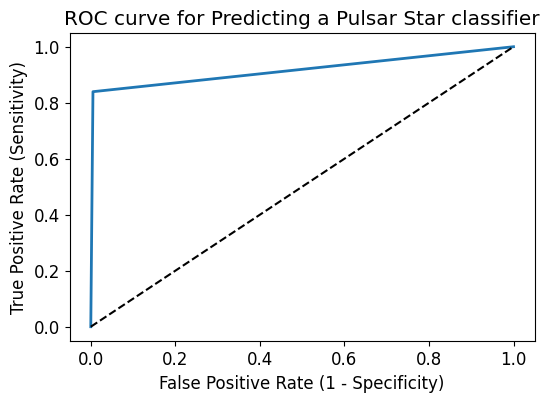

In [145]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)#menghitung nilai false positive rate (FPR), true positive rate (TPR), dan thresholds (ambang batas) menggunakan fungsi roc_curve untuk digunakan dalam plot ROC.

plt.figure(figsize=(6,4))# membuat gambar plot dengan ukuran 6x4 inci.

plt.plot(fpr, tpr, linewidth=2)#menggambar kurva ROC dengan false positive rate (FPR) sebagai sumbu x dan true positive rate (TPR) sebagai sumbu y.

plt.plot([0,1], [0,1], 'k--' )#menggambar garis diagonal yang merupakan referensi untuk model yang benar-benar acak.

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting a Pulsar Star classifier')#judul

plt.xlabel('False Positive Rate (1 - Specificity)')#label sumbu x

plt.ylabel('True Positive Rate (Sensitivity)')#label sumbu y

plt.show()#menampilkan plot ROC.

In [ ]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred_test)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9171


In [146]:
# calculate cross-validated ROC AUC
from sklearn.model_selection import cross_val_score

# menghitung area di bawah kurva ROC (ROC AUC) menggunakan fungsi roc_auc_score.
Cross_validated_ROC_AUC = cross_val_score(linear_svc, X_train, y_train, cv=10, scoring='roc_auc').mean()

#mencetak ROC AUC dengan empat angka di belakang koma. ROC AUC memberikan ukuran keseluruhan kinerja model dalam membedakan kelas positif dan negatif. Semakin tinggi nilai ROC AUC, semakin baik kinerja model.
print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.9756


In [147]:
#mengimpor kelas KFold dari modul model_selection di scikit-learn.
from sklearn.model_selection import KFold

#membuat objek KFold dengan jumlah lipatan (n_splits) sebanyak 5, pengacakan (shuffle) diaktifkan, dan keadaan acak (random_state) ditetapkan sebagai 0.
kfold=KFold(n_splits=5, shuffle=True, random_state=0)

#membuat objek SVC dengan kernel linear.
linear_svc=SVC(kernel='linear')

#melakukan validasi silang (cross-validation) menggunakan model SVC dengan kernel linear, data X, dan label y dengan menggunakan objek kfold yang telah dibuat sebelumnya. Hasil validasi silang disimpan dalam linear_scores.
linear_scores = cross_val_score(linear_svc, X, y, cv=kfold)

In [148]:
# mencetak skor validasi silang untuk model dengan kernel linear. Hasil ini menunjukkan kinerja model pada setiap lipatan dalam validasi silang.

print('Stratified cross-validation scores with linear kernel:\n\n{}'.format(linear_scores))

Stratified cross-validation scores with linear kernel:

[0.98296089 0.97458101 0.97988827 0.97876502 0.97848561]


In [149]:
# mencetak rata-rata skor validasi silang untuk model dengan kernel linear. Ini memberikan gambaran tentang kinerja model secara keseluruhan dalam validasi silang.

print('Average stratified cross-validation score with linear kernel:{:.4f}'.format(linear_scores.mean()))

Average stratified cross-validation score with linear kernel:0.9789


In [150]:
#membuat objek SVC dengan kernel rbf (radial basis function).
rbf_svc=SVC(kernel='rbf')

#melakukan validasi silang (cross-validation) menggunakan model SVC dengan kernel rbf, data X, dan label y dengan menggunakan objek kfold yang telah dibuat sebelumnya. Hasil validasi silang disimpan dalam rbf_scores.
rbf_scores = cross_val_score(rbf_svc, X, y, cv=kfold)

In [151]:
# mencetak skor validasi silang untuk model dengan kernel rbf. Hasil ini menunjukkan kinerja model pada setiap lipatan dalam validasi silang.

print('Stratified Cross-validation scores with rbf kernel:\n\n{}'.format(rbf_scores))

Stratified Cross-validation scores with rbf kernel:

[0.97849162 0.97011173 0.97318436 0.9709416  0.96982397]


In [152]:
# mencetak rata-rata skor validasi silang untuk model dengan kernel rbf. Ini memberikan gambaran tentang kinerja model secara keseluruhan dalam validasi silang.

print('Average stratified cross-validation score with rbf kernel:{:.4f}'.format(rbf_scores.mean()))

Average stratified cross-validation score with rbf kernel:0.9725


In [154]:
# import GridSearchCV
#GridSearchCV digunakan untuk melakukan pencarian parameter terbaik untuk model menggunakan metode grid search.
from sklearn.model_selection import GridSearchCV


# import SVC classifier
from sklearn.svm import SVC


# instantiate classifier with default hyperparameters with kernel=rbf, C=1.0 and gamma=auto
svc=SVC()



# declare parameters for hyperparameter tuning
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]}
              ]



# membuat objek GridSearchCV untuk mencari parameter terbaik untuk model SVC.
#estimator adalah model yang akan dioptimalkan.
#param_grid adalah himpunan parameter yang akan dieksplorasi
#scoring adalah metrik yang akan dievaluasi
#cv adalah jumlah lipatan dalam validasi silang
#verbose mengontrol keberagaman keluaran.
grid_search = GridSearchCV(estimator = svc,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)

#melakukan pencarian grid pada data pelatihan X_train dan label pelatihan y_train, sehingga mendapatkan parameter terbaik untuk model SVC.
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='accuracy')

In [155]:
# examine the best model


# mencetak skor terbaik yang dicapai oleh model selama pencarian grid.
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))


# mencetak parameter yang memberikan hasil terbaik selama pencarian grid.
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))


# mencetak estimator yang dipilih oleh pencarian grid berdasarkan parameter terbaik yang ditemukan.
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.9793


Parameters that give the best results : 

 {'C': 10, 'gamma': 0.3, 'kernel': 'rbf'}


Estimator that was chosen by the search : 

 SVC(C=10, gamma=0.3)


In [156]:
# mencetak skor hasil pencarian grid pada data pengujian (X_test) dan label pengujian (y_test). Skor ini mengukur kinerja model yang dioptimalkan menggunakan parameter terbaik pada data pengujian.
print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.9835
